**Set Up the Environment
**

In [14]:
!pip install torch torchvision transformers diffusers datasets accelerate scipy


For checking Chip


In [15]:
#device = "cuda" if torch.cuda.is_available() else "cpu"   ->  pipe.to("device")

Load and Preprocess Dataset

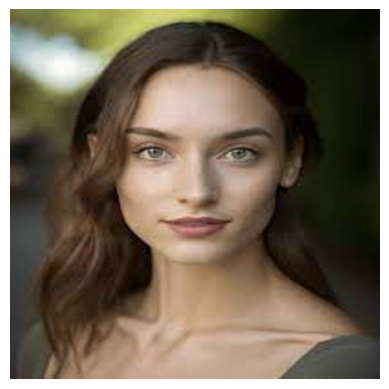

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
from diffusers import StableDiffusionImg2ImgPipeline


img_path = "/content/imagesOfWomen.jpeg"
img = Image.open(img_path).convert("RGB").resize((512, 512))  # resizing for the model

# Visualize the input image
plt.imshow(img)
plt.axis("off")
plt.show()


Load Pretrained Stable Diffusion Model

In [17]:
# Loading pre-trained model LoRA
model_name = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Perform Image-to-Image Generation

  0%|          | 0/45 [00:00<?, ?it/s]

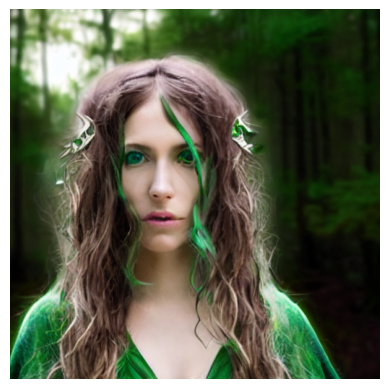

In [18]:
# Define prompt & Change prompt
prompt = "Transform this image of a person with long, wavy hair and a green top, set against an outdoor, natural background, into a fantasy-themed character with elven features, wearing a flowing, ornate robe, and standing in an enchanted forest."

# Image-to-image generation
output = pipe(
    prompt=prompt,
    image=img,  # Input image
    strength=0.9,  # Controls noise level (0.1-1.0)
    guidance_scale=7.5  # Adherence to prompt
).images[0]

# Save and display  output
output_path = "/content/output_image.jpg"
output.save(output_path)

# Show the generated image
plt.imshow(output)
plt.axis("off")
plt.show()
